<font size="6" color='red'>Miuul Feature Engineering</font>
1. [Outliers](#outliers)
2. [Missing Values](#missing_values)
3. [Encoding Scaling](#encoding_scaling)
4. [Feature Extraction](#feature_extraction)
5. [Application](#application)

<font size="5" color='red'>1. Outliers</font> <a id='outliers'></a>

##### "If your data is bad, your machine learning tools are useless"

##### "Applied machine learning is basically feature engineering""

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [2]:
def load_application_train():
    data = pd.read_csv("application_train.csv")
    return data
df = load_application_train()
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
def load():
    data = pd.read_csv("titanic.csv")
    return data
df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


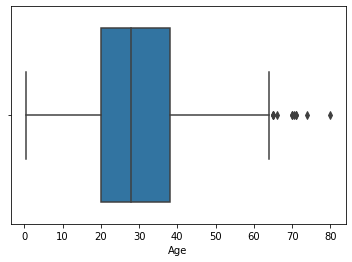

In [4]:
sns.boxplot(x=df["Age"])
plt.show()

In [5]:
#Aykırı değerler nasıl yakalanır?
q1 = df["Age"].quantile(0.25)
q1

20.125

In [6]:
q3 = df["Age"].quantile(0.75)
q3

38.0

In [7]:
iqr = q3-q1
up = q3+1.5*iqr
low = q1-1.5*iqr

In [8]:
up

64.8125

In [9]:
low

-6.6875

In [10]:
df[(df["Age"] < low) | (df["Age"] > up)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


In [11]:
#Aykırı değerlerin indexleri
df[(df["Age"] < low) | (df["Age"] > up)].index

Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [12]:
#Aykırı değer var mı?
df[(df["Age"] < low) | (df["Age"] > up)].any(axis=None)

True

In [13]:
#Fonksiyonlaştırma
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quantile1=dataframe[col_name].quantile(q1)
    quantile3=dataframe[col_name].quantile(q3)
    interquantile_range=quantile3-quantile1
    up_limit=quantile3+1.5*interquantile_range
    low_limit=quantile1-1.5*interquantile_range
    return low_limit, up_limit

In [14]:
outlier_thresholds(df, "Age")

(-6.6875, 64.8125)

In [15]:
low, up = outlier_thresholds(df, "Age")

In [16]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [17]:
check_outlier(df, "Age")

True

In [18]:
check_outlier(df, "Fare")

True

In [19]:
# grab_col_names
dff = load_application_train()
dff.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [21]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [22]:
cat_cols

['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']

In [23]:
num_cols

['PassengerId', 'Age', 'Fare']

In [24]:
num_cols = [col for col in num_cols if col not in "PassengerId"]

In [25]:
num_cols

['Age', 'Fare']

In [26]:
for col in num_cols:
    print(col, check_outlier(df, col))

Age True
Fare True


In [27]:
cat_cols, num_cols, cat_but_car = grab_col_names(dff)

Observations: 307511
Variables: 122
cat_cols: 54
num_cols: 67
cat_but_car: 1
num_but_cat: 39


In [28]:
num_cols

['SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI'

In [29]:
for col in num_cols:
    print(col, check_outlier(dff, col))

SK_ID_CURR False
CNT_CHILDREN True
AMT_INCOME_TOTAL True
AMT_CREDIT True
AMT_ANNUITY True
AMT_GOODS_PRICE True
REGION_POPULATION_RELATIVE True
DAYS_BIRTH False
DAYS_EMPLOYED True
DAYS_REGISTRATION True
DAYS_ID_PUBLISH False
OWN_CAR_AGE True
CNT_FAM_MEMBERS True
HOUR_APPR_PROCESS_START True
EXT_SOURCE_1 False
EXT_SOURCE_2 False
EXT_SOURCE_3 False
APARTMENTS_AVG True
BASEMENTAREA_AVG True
YEARS_BEGINEXPLUATATION_AVG True
YEARS_BUILD_AVG True
COMMONAREA_AVG True
ELEVATORS_AVG True
ENTRANCES_AVG True
FLOORSMAX_AVG True
FLOORSMIN_AVG True
LANDAREA_AVG True
LIVINGAPARTMENTS_AVG True
LIVINGAREA_AVG True
NONLIVINGAPARTMENTS_AVG True
NONLIVINGAREA_AVG True
APARTMENTS_MODE True
BASEMENTAREA_MODE True
YEARS_BEGINEXPLUATATION_MODE True
YEARS_BUILD_MODE True
COMMONAREA_MODE True
ELEVATORS_MODE True
ENTRANCES_MODE True
FLOORSMAX_MODE True
FLOORSMIN_MODE True
LANDAREA_MODE True
LIVINGAPARTMENTS_MODE True
LIVINGAREA_MODE True
NONLIVINGAPARTMENTS_MODE True
NONLIVINGAREA_MODE True
APARTMENTS_MEDI True
B

In [30]:
num_cols = [col for col in num_cols if col not in "SK_ID_CURR"]

In [31]:
for col in num_cols:
    print(col, check_outlier(dff, col))

CNT_CHILDREN True
AMT_INCOME_TOTAL True
AMT_CREDIT True
AMT_ANNUITY True
AMT_GOODS_PRICE True
REGION_POPULATION_RELATIVE True
DAYS_BIRTH False
DAYS_EMPLOYED True
DAYS_REGISTRATION True
DAYS_ID_PUBLISH False
OWN_CAR_AGE True
CNT_FAM_MEMBERS True
HOUR_APPR_PROCESS_START True
EXT_SOURCE_1 False
EXT_SOURCE_2 False
EXT_SOURCE_3 False
APARTMENTS_AVG True
BASEMENTAREA_AVG True
YEARS_BEGINEXPLUATATION_AVG True
YEARS_BUILD_AVG True
COMMONAREA_AVG True
ELEVATORS_AVG True
ENTRANCES_AVG True
FLOORSMAX_AVG True
FLOORSMIN_AVG True
LANDAREA_AVG True
LIVINGAPARTMENTS_AVG True
LIVINGAREA_AVG True
NONLIVINGAPARTMENTS_AVG True
NONLIVINGAREA_AVG True
APARTMENTS_MODE True
BASEMENTAREA_MODE True
YEARS_BEGINEXPLUATATION_MODE True
YEARS_BUILD_MODE True
COMMONAREA_MODE True
ELEVATORS_MODE True
ENTRANCES_MODE True
FLOORSMAX_MODE True
FLOORSMIN_MODE True
LANDAREA_MODE True
LIVINGAPARTMENTS_MODE True
LIVINGAREA_MODE True
NONLIVINGAPARTMENTS_MODE True
NONLIVINGAREA_MODE True
APARTMENTS_MEDI True
BASEMENTAREA_MEDI 

In [32]:
#Aykırı değerlerin kendilerine erişmek
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)
    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])
    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

In [33]:
grab_outliers(df, "Age")

     PassengerId  Survived  Pclass                            Name   Sex  \
33            34         0       2           Wheadon, Mr. Edward H  male   
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male   
96            97         0       1       Goldschmidt, Mr. George B  male   
116          117         0       3            Connors, Mr. Patrick  male   
280          281         0       3                Duane, Mr. Frank  male   

      Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
33   66.0      0      0  C.A. 24579  10.5000   NaN        S  
54   65.0      0      1      113509  61.9792   B30        C  
96   71.0      0      0    PC 17754  34.6542    A5        C  
116  70.5      0      0      370369   7.7500   NaN        Q  
280  65.0      0      0      336439   7.7500   NaN        Q  


In [34]:
grab_outliers(df, "Age", "True")

     PassengerId  Survived  Pclass                            Name   Sex  \
33            34         0       2           Wheadon, Mr. Edward H  male   
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male   
96            97         0       1       Goldschmidt, Mr. George B  male   
116          117         0       3            Connors, Mr. Patrick  male   
280          281         0       3                Duane, Mr. Frank  male   

      Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
33   66.0      0      0  C.A. 24579  10.5000   NaN        S  
54   65.0      0      1      113509  61.9792   B30        C  
96   71.0      0      0    PC 17754  34.6542    A5        C  
116  70.5      0      0      370369   7.7500   NaN        Q  
280  65.0      0      0      336439   7.7500   NaN        Q  


Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [35]:
age_index = grab_outliers(df, "Age", "True")

     PassengerId  Survived  Pclass                            Name   Sex  \
33            34         0       2           Wheadon, Mr. Edward H  male   
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male   
96            97         0       1       Goldschmidt, Mr. George B  male   
116          117         0       3            Connors, Mr. Patrick  male   
280          281         0       3                Duane, Mr. Frank  male   

      Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
33   66.0      0      0  C.A. 24579  10.5000   NaN        S  
54   65.0      0      1      113509  61.9792   B30        C  
96   71.0      0      0    PC 17754  34.6542    A5        C  
116  70.5      0      0      370369   7.7500   NaN        Q  
280  65.0      0      0      336439   7.7500   NaN        Q  


In [36]:
age_index

Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [37]:
#Aykırı değerleri silme
low, up = outlier_thresholds(df, "Fare")

In [38]:
low

-26.724

In [39]:
up

65.6344

In [40]:
df.shape

(891, 12)

In [41]:
df[~((df["Fare"] < low) | (df["Fare"] > up))].shape

(775, 12)

In [42]:
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

In [43]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [44]:
num_cols = [col for col in num_cols if col not in "PassengerId"]

In [45]:
df.shape

(891, 12)

In [46]:
for col in num_cols:
    new_df = remove_outlier(df, col)

In [47]:
df.shape[0] - new_df.shape[0]

116

In [48]:
#Aykırı değerleri baskılama
low, up = outlier_thresholds(df, "Fare")

In [49]:
low

-26.724

In [50]:
up

65.6344

In [51]:
df[((df["Fare"] < low) | (df["Fare"] > up))]["Fare"]

1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64

In [52]:
df.loc[((df["Fare"] < low) | (df["Fare"] > up)), "Fare"]

1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64

In [53]:
df.loc[(df["Fare"] > up), "Fare"]

1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64

In [54]:
df.loc[(df["Fare"] > up), "Fare"] = up

In [55]:
df.loc[(df["Fare"] > up), "Fare"]

Series([], Name: Fare, dtype: float64)

In [56]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [57]:
df = load()

In [58]:
df.shape

(891, 12)

In [59]:
for col in num_cols:
    print(col, check_outlier(df, col))

Age True
Fare True


In [60]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [61]:
for col in num_cols:
    print(col, check_outlier(df, col))

Age False
Fare False


In [62]:
### RECAP ###
df = load()
outlier_thresholds(df, "Age")

(-6.6875, 64.8125)

In [63]:
check_outlier(df, "Age")

True

In [64]:
grab_outliers(df, "Age", index=True)

     PassengerId  Survived  Pclass                            Name   Sex  \
33            34         0       2           Wheadon, Mr. Edward H  male   
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male   
96            97         0       1       Goldschmidt, Mr. George B  male   
116          117         0       3            Connors, Mr. Patrick  male   
280          281         0       3                Duane, Mr. Frank  male   

      Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
33   66.0      0      0  C.A. 24579  10.5000   NaN        S  
54   65.0      0      1      113509  61.9792   B30        C  
96   71.0      0      0    PC 17754  34.6542    A5        C  
116  70.5      0      0      370369   7.7500   NaN        Q  
280  65.0      0      0      336439   7.7500   NaN        Q  


Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [65]:
remove_outlier(df, "Age").shape

(880, 12)

In [66]:
replace_with_thresholds(df, "Age")

In [67]:
check_outlier(df, "Age")

False

#### "Tek başına aykırı olamayacak bazı değerler birlikte ele alındığında bu durum aykırılık yaratıyor olabilir"

In [68]:
### LOCAL OUTLIER FACTOR ###
### 17 yaş => aykırı değildir
### 3 kere evlenmek => aykırı değildir
### 17 yaşında 3 kere evlenmek => aykırıdır !!!

In [69]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [70]:
df = df.select_dtypes(include=['float64', 'int64'])

In [71]:
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [72]:
df=df.dropna()

In [73]:
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [74]:
for col in df.columns:
    print(col, check_outlier(df, col))

carat True
depth True
table True
price True
x True
y True
z True


In [75]:
df.shape

(53940, 7)

In [76]:
low, up = outlier_thresholds(df, "carat")

In [77]:
df[(df["carat"] < low) | (df["carat"] > up)].shape

(1889, 7)

In [78]:
low, up = outlier_thresholds(df, "depth")

In [79]:
df[(df["depth"] < low) | (df["depth"] > up)].shape

(2545, 7)

In [80]:
clf = LocalOutlierFactor(n_neighbors=20)

In [81]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [82]:
df_scores = clf.negative_outlier_factor_

In [83]:
df_scores[0:5]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521])

In [84]:
np.sort(df_scores)[0:5]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092])

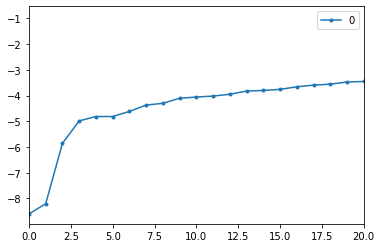

In [85]:
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0,20], style='.-')
plt.show()

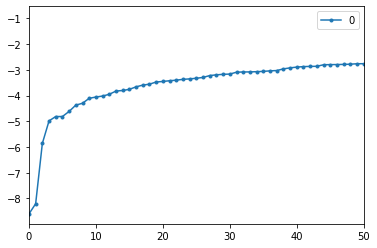

In [86]:
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0,50], style='.-')
plt.show()

In [87]:
th = np.sort(df_scores)[3]

In [88]:
th

-4.984151747711709

In [89]:
df[df_scores < th]

,carat,depth,table,price,x,y,z
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [90]:
df[df_scores < th].shape

(3, 7)

In [91]:
df.describe([0.01, 0.05, 0.75, 0.90, 0.99]).T

,count,mean,std,min,1%,5%,50%,75%,90%,99%,max
carat,53940.0,0.797940,0.474011,0.2,0.24,0.30,0.70,1.04,1.51,2.18,5.01
depth,53940.0,61.749405,1.432621,43.0,57.90,59.30,61.80,62.50,63.30,65.60,79.00
table,53940.0,57.457184,2.234491,43.0,53.00,54.00,57.00,59.00,60.00,64.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,429.00,544.00,2401.00,5324.25,9821.00,17378.22,18823.00
x,53940.0,5.731157,1.121761,0.0,4.02,4.29,5.70,6.54,7.31,8.36,10.74
y,53940.0,5.734526,1.142135,0.0,4.04,4.30,5.71,6.54,7.30,8.34,58.90
z,53940.0,3.538734,0.705699,0.0,2.48,2.65,3.53,4.04,4.52,5.15,31.80


In [92]:
df[df_scores < th].index

Int64Index([41918, 48410, 49189], dtype='int64')

In [93]:
df[df_scores < th].drop(axis=0, labels=df[df_scores < th].index)

,carat,depth,table,price,x,y,z


<font size="5" color='red'>2. Missing Values</font> <a id='missing_values'></a>

In [94]:
# 1. Silme
# 2. Değer atama yöntemleri
# 3. Tahmine dayalı yöntemler

### EKSİK DEĞERLERİN YAKALANMASI ###
df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [95]:
df.isnull().values.any()

True

In [96]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [97]:
df.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [98]:
df.isnull().sum().sum()

866

In [99]:
df[df.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [100]:
df[df.notnull().all(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [101]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [102]:
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [103]:
na_cols = [col for col in df.columns if df[col].isnull().sum() > 0]
na_cols

['Age', 'Cabin', 'Embarked']

In [104]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0]*100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

In [105]:
missing_values_table(df)

          n_miss  ratio
Cabin        687  77.10
Age          177  19.87
Embarked       2   0.22


In [106]:
missing_values_table(df, True)

          n_miss  ratio
Cabin        687  77.10
Age          177  19.87
Embarked       2   0.22


['Age', 'Cabin', 'Embarked']

In [107]:
### ÇÖZÜM 1: HIZLICA SİLMEK ###
df.dropna().shape

(183, 12)

In [108]:
### ÇÖZÜM 2: BASİT ATAMA YÖNTEMLERİ İLE DOLDURMAK ###
df["Age"].fillna(df["Age"].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [109]:
df["Age"].fillna(df["Age"].mean()).isnull().sum()

0

In [110]:
# df.apply(lambda x: x.fillna(x.mean()), axis=0)

In [111]:
dff = df.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)

In [112]:
dff.isnull().sum().sort_values(ascending=False)

Cabin          687
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [113]:
# Kategorik değişkenler için en mantıklı doldurma yöntemi modunu almaktır
df["Embarked"].mode()[0]

'S'

In [114]:
df["Embarked"].fillna(df["Embarked"].mode()[0]).isnull().sum()

0

In [115]:
df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <=10) else x, axis=0).isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [116]:
#Kategorik değişken kırılımında değer atama
df.groupby("Sex")["Age"].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [117]:
df["Age"].mean()

29.69911764705882

In [118]:
df["Age"].fillna(df.groupby("Sex")["Age"].transform("mean")).isnull().sum()

0

In [119]:
df.loc[(df["Age"].isnull()) & (df["Sex"] == "female"), "Age"] = df.groupby("Sex")["Age"].mean()["female"]

In [120]:
df.loc[(df["Age"].isnull()) & (df["Sex"] == "male"), "Age"] = df.groupby("Sex")["Age"].mean()["male"]

In [121]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [122]:
### TAHMİNE DAYALI ATAMA İLE DOLDURMA ###
# 1. silmek
# 2. basit yöntemlerle atamak
# 3. tahmine dayalı
df = load()

In [123]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [124]:
num_cols = [col for col in num_cols if col not in "PassengerId"]

In [125]:
num_cols

['Age', 'Fare']

In [126]:
cat_cols

['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']

In [127]:
dff = pd.get_dummies(df[cat_cols + num_cols], drop_first=True)

In [128]:
dff.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,1,0,22.0,7.2500,1,0,1
1,1,1,1,0,38.0,71.2833,0,0,0
2,1,3,0,0,26.0,7.9250,0,0,1
3,1,1,1,0,35.0,53.1000,0,0,1
4,0,3,0,0,35.0,8.0500,1,0,1


In [129]:
#Değişkenlerin standartlaştırılması
scaler = MinMaxScaler()
dff = pd.DataFrame(scaler.fit_transform(dff), columns = dff.columns)
dff.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,1.0,0.125,0.0,0.271174,0.014151,1.0,0.0,1.0
1,1.0,0.0,0.125,0.0,0.472229,0.139136,0.0,0.0,0.0
2,1.0,1.0,0.000,0.0,0.321438,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.125,0.0,0.434531,0.103644,0.0,0.0,1.0
4,0.0,1.0,0.000,0.0,0.434531,0.015713,1.0,0.0,1.0


In [130]:
from sklearn.impute import KNNImputer

In [131]:
imputer = KNNImputer(n_neighbors=5)
dff = pd.DataFrame(imputer.fit_transform(dff), columns=dff.columns)
dff.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,1.0,0.125,0.0,0.271174,0.014151,1.0,0.0,1.0
1,1.0,0.0,0.125,0.0,0.472229,0.139136,0.0,0.0,0.0
2,1.0,1.0,0.000,0.0,0.321438,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.125,0.0,0.434531,0.103644,0.0,0.0,1.0
4,0.0,1.0,0.000,0.0,0.434531,0.015713,1.0,0.0,1.0


In [132]:
dff = pd.DataFrame(scaler.inverse_transform(dff), columns=dff.columns)

In [133]:
dff.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,3.0,1.0,0.0,22.0,7.2500,1.0,0.0,1.0
1,1.0,1.0,1.0,0.0,38.0,71.2833,0.0,0.0,0.0
2,1.0,3.0,0.0,0.0,26.0,7.9250,0.0,0.0,1.0
3,1.0,1.0,1.0,0.0,35.0,53.1000,0.0,0.0,1.0
4,0.0,3.0,0.0,0.0,35.0,8.0500,1.0,0.0,1.0


In [134]:
df["age_imputed_knn"] = dff[["Age"]]

In [135]:
df.loc[df["Age"].isnull(), ["Age", "age_imputed_knn"]]

,Age,age_imputed_knn
5,NaN,47.8
17,NaN,37.6
19,NaN,12.2
26,NaN,32.8
28,NaN,17.6
...,...,...
859,NaN,25.8
863,NaN,8.8
868,NaN,25.0
878,NaN,24.4


In [136]:
df.loc[df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_imputed_knn
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,47.8
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,37.6
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,12.2
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,32.8
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,17.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,25.8
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,8.8
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,25.0
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,24.4


In [137]:
### RECAP ###
df = load()
# missing table
missing_values_table(df)

          n_miss  ratio
Cabin        687  77.10
Age          177  19.87
Embarked       2   0.22


In [138]:
# sayısal değişkenleri median ile doldurma
df.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0).isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [139]:
# kategorik değişkenleri mode ile doldurma
df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0).isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [140]:
# kategorik değişken kırılımda sayısal değişken doldurma
df["Age"].fillna(df.groupby("Sex")["Age"].transform("mean")).isnull().sum()

0

In [141]:
# tahmine dayalı atama ile doldurma

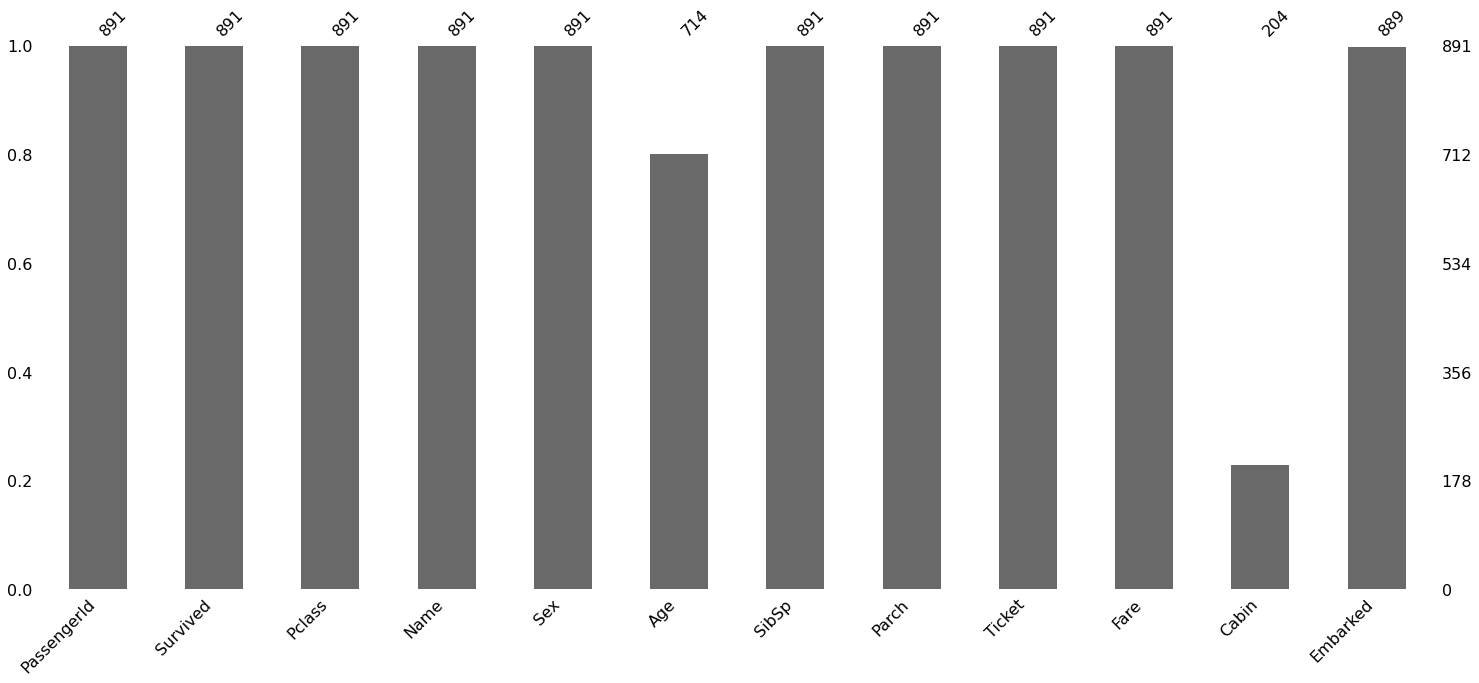

In [142]:
### GELİŞMİŞ ANALİZLER ###
df = load()
msno.bar(df)
plt.show()

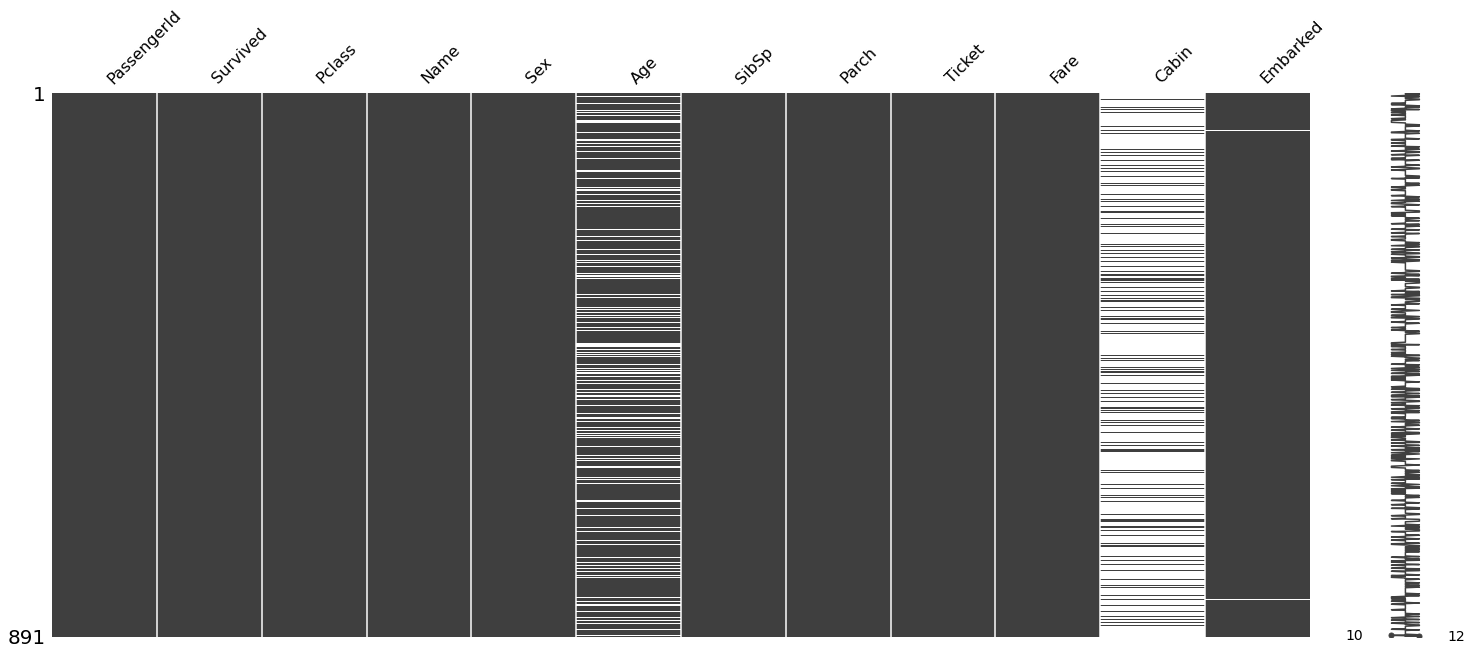

In [143]:
msno.matrix(df)
plt.show()

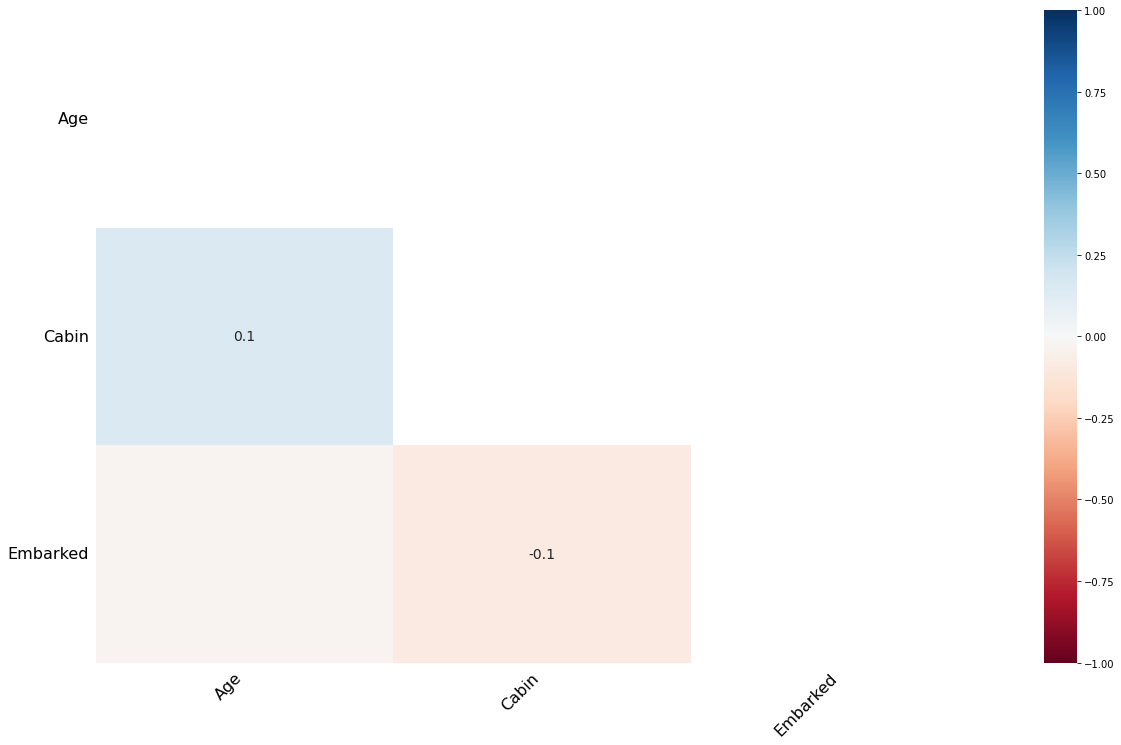

In [144]:
msno.heatmap(df)
plt.show()

In [145]:
###############################
# Eksik değerlerin bağımlı değişken ile ilişkisinin incelenmesi
###############################
missing_values_table(df, True)

          n_miss  ratio
Cabin        687  77.10
Age          177  19.87
Embarked       2   0.22


['Age', 'Cabin', 'Embarked']

In [146]:
na_cols = missing_values_table(df, True)

          n_miss  ratio
Cabin        687  77.10
Age          177  19.87
Embarked       2   0.22


In [147]:
def missing_vs_target(dataframe, target, na_columns):
    temp_df=dataframe.copy()
    for col in na_columns:
        temp_df[col + '_NA_FLAG']=np.where(temp_df[col].isnull(), 1, 0)
    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns
    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")

In [148]:
missing_vs_target(df, "Survived", na_cols)

             TARGET_MEAN  Count
Age_NA_FLAG                    
0               0.406162    714
1               0.293785    177


               TARGET_MEAN  Count
Cabin_NA_FLAG                    
0                 0.666667    204
1                 0.299854    687


                  TARGET_MEAN  Count
Embarked_NA_FLAG                    
0                    0.382452    889
1                    1.000000      2




##### Survived, hayatta kalma durumunu ne etkiliyor?

##### Cabin değişkeninde eksiklik olanların hayatta kalma oranı %30, eksiklik olmayanların hayatta kalma oranı %66.

##### Aslında bunun arkadasındaki hikaye, NA bilgilerinin bir çoğu gemi çalışanlarına aitmiş. 

<font size="5" color='red'>3. Encoding Scaling</font> <a id='encoding_scaling'></a>

###### Encoding nedir ?
###### Encoding = Değişkenlerin temsil şekillerinin değiştirilmesi

###### Label Encoding
<hr style="border:1px solid gray">

| SEX| IS_FEMALE |
| ----| ----|
| MALE | 0 |
| FEMALE | 1 |
| FEMALE | 1 |
| MALE | 0 |
| MALE | 0 |

In [149]:
### LABEL ENCODING & BINARY ENCODING ###
df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [150]:
df["Sex"].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [151]:
le = LabelEncoder()
le.fit_transform(df["Sex"])[0:5]

array([1, 0, 0, 0, 1])

###### Label Encoder alfabetik olarak ilk gördüğü değere 0 değerini verir.

In [152]:
le.inverse_transform([0, 1])

array(['female', 'male'], dtype=object)

In [153]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [154]:
df = load()

In [155]:
binary_cols = [col for col in df.columns if df[col].dtype not in ["int64", "float64"]
               and df[col].nunique() == 2]

In [156]:
binary_cols

['Sex']

In [157]:
for col in binary_cols:
    label_encoder(df, col)

In [158]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [159]:
df = load_application_train()
df.shape

(307511, 122)

In [160]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [161]:
binary_cols = [col for col in df.columns if df[col].dtype not in ["int64", "float64"]
               and df[col].nunique() == 2]

In [162]:
binary_cols

['NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'EMERGENCYSTATE_MODE']

In [163]:
df[binary_cols].head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE
0,Cash loans,N,Y,No
1,Cash loans,N,N,No
2,Revolving loans,Y,Y,NaN
3,Cash loans,N,Y,NaN
4,Cash loans,N,Y,NaN


In [164]:
for col in binary_cols:
    label_encoder(df, col)

In [165]:
df[binary_cols].head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE
0,0,0,1,0
1,0,0,0,0
2,1,1,1,2
3,0,0,1,2
4,0,0,1,2


###### EMERGENCYSTATE_MODE değişkenindeki boş değerler 2 değeri ile dolduruldu, bunun farkında olduktan sonra bu işlem tehlikeli değildir, kimi zaman boş değerleri doldurmakta yöntem olarak da kullanılır.

In [166]:
df = load()
df["Embarked"].nunique()

3

In [167]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [168]:
len(df["Embarked"].unique())

4

In [169]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

###### One-Hot Encoding
<hr style="border:1px solid gray">

| TEAM | GS | FB  | BJK |
| ----| ----| ----| ----|
| GS | 1 | 0 | 0 |
| FB | 0 | 1 | 0 |
| BJK | 0 | 0 | 1 |

In [170]:
df = load()
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [171]:
pd.get_dummies(df, columns=["Embarked"]).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1


In [172]:
pd.get_dummies(df, columns=["Embarked"], drop_first=True).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,1


In [173]:
pd.get_dummies(df, columns=["Embarked"], dummy_na=True).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1,0


In [174]:
pd.get_dummies(df, columns=["Sex"], drop_first=True).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [175]:
pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1


In [176]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [177]:
df = load()

In [178]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [179]:
cat_cols

['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']

In [180]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

In [181]:
ohe_cols

['Pclass', 'SibSp', 'Parch', 'Embarked']

In [182]:
one_hot_encoder(df, ohe_cols).head()

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Cabin,Pclass_2,Pclass_3,...,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,0,1,...,0,0,0,0,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,0,1,...,0,0,0,0,0,0,0,0,0,1


###### Rare Encoding
<hr style="border:1px solid gray">

###### "Gereksiz değişkenlerden kurtulmak"

###### 1. Kategorik değişkenlerin azlık çokluk durumunu
###### 2. Rare kategoriler ile bağımlı değişken arasındaki ilişki
###### 3. Rare Encoder

In [183]:
### 1. Kategorik değişkenlerin azlık çokluk durumunu ###
df = load_application_train()
df["NAME_EDUCATION_TYPE"].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [184]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 307511
Variables: 122
cat_cols: 54
num_cols: 67
cat_but_car: 1
num_but_cat: 39


In [185]:
cat_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'TARGET',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOC

In [186]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

In [187]:
for col in cat_cols:
    cat_summary(df, col)

                 NAME_CONTRACT_TYPE      Ratio
Cash loans                   278232  90.478715
Revolving loans               29279   9.521285
##########################################
     CODE_GENDER      Ratio
F         202448  65.834393
M         105059  34.164306
XNA            4   0.001301
##########################################
   FLAG_OWN_CAR      Ratio
N        202924  65.989184
Y        104587  34.010816
##########################################
   FLAG_OWN_REALTY      Ratio
Y           213312  69.367275
N            94199  30.632725
##########################################
                 NAME_TYPE_SUITE      Ratio
Unaccompanied             248526  80.818572
Family                     40149  13.056118
Spouse, partner            11370   3.697429
Children                    3267   1.062401
Other_B                     1770   0.575589
Other_A                      866   0.281616
Group of people              271   0.088127
##########################################
         

In [188]:
### 2. Rare değişkenler ile bağımlı değişkenler arasındaki ilişki ###
df["NAME_INCOME_TYPE"].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [189]:
df.groupby("NAME_INCOME_TYPE")["TARGET"].mean()

NAME_INCOME_TYPE
Businessman             0.000000
Commercial associate    0.074843
Maternity leave         0.400000
Pensioner               0.053864
State servant           0.057550
Student                 0.000000
Unemployed              0.363636
Working                 0.095885
Name: TARGET, dtype: float64

In [190]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [191]:
rare_analyser(df, "TARGET", cat_cols)

NAME_CONTRACT_TYPE : 2
                  COUNT     RATIO  TARGET_MEAN
Cash loans       278232  0.904787     0.083459
Revolving loans   29279  0.095213     0.054783


CODE_GENDER : 3
      COUNT     RATIO  TARGET_MEAN
F    202448  0.658344     0.069993
M    105059  0.341643     0.101419
XNA       4  0.000013     0.000000


FLAG_OWN_CAR : 2
    COUNT     RATIO  TARGET_MEAN
N  202924  0.659892     0.085002
Y  104587  0.340108     0.072437


FLAG_OWN_REALTY : 2
    COUNT     RATIO  TARGET_MEAN
N   94199  0.306327     0.083249
Y  213312  0.693673     0.079616


NAME_TYPE_SUITE : 7
                  COUNT     RATIO  TARGET_MEAN
Children           3267  0.010624     0.073768
Family            40149  0.130561     0.074946
Group of people     271  0.000881     0.084871
Other_A             866  0.002816     0.087760
Other_B            1770  0.005756     0.098305
Spouse, partner   11370  0.036974     0.078716
Unaccompanied    248526  0.808186     0.081830


NAME_INCOME_TYPE : 8
                  

In [192]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()
    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]
    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])
    return temp_df

In [193]:
new_df = rare_encoder(df, 0.01)

In [194]:
rare_analyser(new_df, "TARGET", cat_cols)

NAME_CONTRACT_TYPE : 2
                  COUNT     RATIO  TARGET_MEAN
Cash loans       278232  0.904787     0.083459
Revolving loans   29279  0.095213     0.054783


CODE_GENDER : 3
       COUNT     RATIO  TARGET_MEAN
F     202448  0.658344     0.069993
M     105059  0.341643     0.101419
Rare       4  0.000013     0.000000


FLAG_OWN_CAR : 2
    COUNT     RATIO  TARGET_MEAN
N  202924  0.659892     0.085002
Y  104587  0.340108     0.072437


FLAG_OWN_REALTY : 2
    COUNT     RATIO  TARGET_MEAN
N   94199  0.306327     0.083249
Y  213312  0.693673     0.079616


NAME_TYPE_SUITE : 5
                  COUNT     RATIO  TARGET_MEAN
Children           3267  0.010624     0.073768
Family            40149  0.130561     0.074946
Rare               2907  0.009453     0.093911
Spouse, partner   11370  0.036974     0.078716
Unaccompanied    248526  0.808186     0.081830


NAME_INCOME_TYPE : 5
                       COUNT     RATIO  TARGET_MEAN
Commercial associate   71617  0.232892     0.074843
Pens

###### Feature Scaling
<hr style="border:1px solid gray">

###### 1 - Kullanılacak olan yöntemlere değişkenleri gönderirken onlara eşit muamele yapılması gerektiğini bildirmek
###### 2 - Bazı algoritmaların train sürelerini kısaltmak

In [195]:
### STANDARD SCALAR ###
### Ortalamayı çıkar, standart sapmaya böl
df = load()

In [196]:
ss = StandardScaler()

In [197]:
df["Age_standard_scaler"] = ss.fit_transform(df[["Age"]])

In [198]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standard_scaler
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.530377
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.571831
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.254825
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.365167
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.365167


In [199]:
### ROBUST SCALER ###
### Medyanı çıkart, iqr'a böl
rs = RobustScaler()
df["Age_robust_scaler"] = rs.fit_transform(df[["Age"]])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,4.460000e+02,257.353842,1.000000,223.500000,446.000000,668.500000,891.000000
Survived,891.0,3.838384e-01,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.0,2.308642e+00,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Age,714.0,2.969912e+01,14.526497,0.420000,20.125000,28.000000,38.000000,80.000000
SibSp,891.0,5.230079e-01,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.0,3.815937e-01,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891.0,3.220421e+01,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200
Age_standard_scaler,714.0,2.388379e-16,1.000701,-2.016979,-0.659542,-0.117049,0.571831,3.465126
Age_robust_scaler,714.0,9.505553e-02,0.812671,-1.542937,-0.440559,0.000000,0.559441,2.909091


In [200]:
### MINMAX SCALER ###
mms = MinMaxScaler()
df["Age_min_max_scaler"] = mms.fit_transform(df[["Age"]])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,4.460000e+02,257.353842,1.000000,223.500000,446.000000,668.500000,891.000000
Survived,891.0,3.838384e-01,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.0,2.308642e+00,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Age,714.0,2.969912e+01,14.526497,0.420000,20.125000,28.000000,38.000000,80.000000
SibSp,891.0,5.230079e-01,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.0,3.815937e-01,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891.0,3.220421e+01,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200
Age_standard_scaler,714.0,2.388379e-16,1.000701,-2.016979,-0.659542,-0.117049,0.571831,3.465126
Age_robust_scaler,714.0,9.505553e-02,0.812671,-1.542937,-0.440559,0.000000,0.559441,2.909091
Age_min_max_scaler,714.0,3.679206e-01,0.182540,0.000000,0.247612,0.346569,0.472229,1.000000


In [201]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standard_scaler,Age_robust_scaler,Age_min_max_scaler
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.530377,-0.335664,0.271174
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.571831,0.559441,0.472229
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.254825,-0.111888,0.321438
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.365167,0.391608,0.434531
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.365167,0.391608,0.434531


In [202]:
age_cols = [col for col in df.columns if "Age" in col]

In [203]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    
    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: Age, dtype: float64


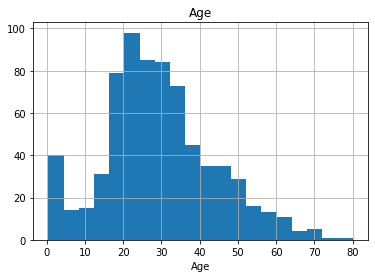

count    7.140000e+02
mean     2.388379e-16
std      1.000701e+00
min     -2.016979e+00
5%      -1.770360e+00
10%     -1.081480e+00
20%     -7.370406e-01
30%     -5.303766e-01
40%     -3.237127e-01
50%     -1.170488e-01
60%      1.447255e-01
70%      4.340550e-01
80%      7.784949e-01
90%      1.398487e+00
95%      1.811815e+00
99%      2.491739e+00
max      3.465126e+00
Name: Age_standard_scaler, dtype: float64


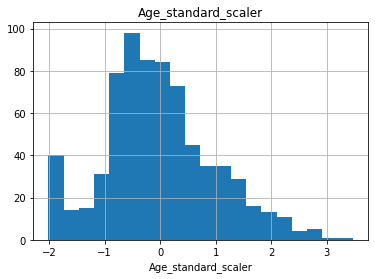

count    714.000000
mean       0.095056
std        0.812671
min       -1.542937
5%        -1.342657
10%       -0.783217
20%       -0.503497
30%       -0.335664
40%       -0.167832
50%        0.000000
60%        0.212587
70%        0.447552
80%        0.727273
90%        1.230769
95%        1.566434
99%        2.118601
max        2.909091
Name: Age_robust_scaler, dtype: float64


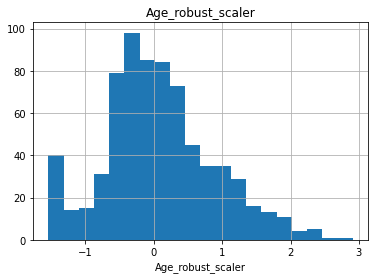

count    714.000000
mean       0.367921
std        0.182540
min        0.000000
5%         0.044986
10%        0.170646
20%        0.233476
30%        0.271174
40%        0.308872
50%        0.346569
60%        0.394320
70%        0.447097
80%        0.509927
90%        0.623021
95%        0.698417
99%        0.822443
max        1.000000
Name: Age_min_max_scaler, dtype: float64


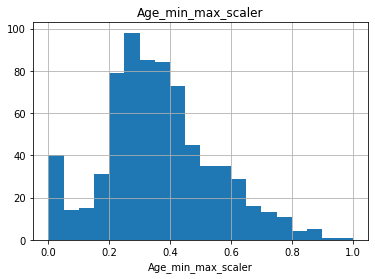

In [204]:
for col in age_cols:
    num_summary(df, col, plot=True)

In [205]:
df["Age_qcut"] = pd.qcut(df['Age'], 5)

In [206]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standard_scaler,Age_robust_scaler,Age_min_max_scaler,Age_qcut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.530377,-0.335664,0.271174,"(19.0, 25.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.571831,0.559441,0.472229,"(31.8, 41.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.254825,-0.111888,0.321438,"(25.0, 31.8]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.365167,0.391608,0.434531,"(31.8, 41.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.365167,0.391608,0.434531,"(31.8, 41.0]"


<font size="5" color='red'>4. Feature Extraction</font> <a id='feature_extraction'></a>

###### Yapısal değişkenlerden özellik çıkarma 
###### "2021-02-05 07:45" Timestamp değişkeninden Year, Month, Day, Hour, Day Name gibi değişkenler çıkarmak.

###### Binary Features
<hr style="border:1px solid gray">

In [207]:
df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [208]:
df["NEW_CABIN_BOOL"] = df["Cabin"].notnull().astype('int')

In [209]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_CABIN_BOOL
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [210]:
df.groupby("NEW_CABIN_BOOL").agg({"Survived": "mean"})

,Survived
NEW_CABIN_BOOL,
0,0.299854
1,0.666667


In [211]:
from statsmodels.stats.proportion import proportions_ztest

In [212]:
test_stat, pvalue = proportions_ztest(count=[df.loc[df["NEW_CABIN_BOOL"] == 1, "Survived"].sum(),
                                             df.loc[df["NEW_CABIN_BOOL"] == 0, "Survived"].sum()],
                                      nobs=[df.loc[df["NEW_CABIN_BOOL"] == 1, "Survived"].shape[0],
                                            df.loc[df["NEW_CABIN_BOOL"] == 0, "Survived"].shape[0]])

In [213]:
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 9.4597, p-value = 0.0000


In [214]:
df.loc[((df["SibSp"] + df["Parch"]) > 0), "NEW_IS_ALONE"] = "NO"
df.loc[((df["SibSp"] + df["Parch"]) == 0), "NEW_IS_ALONE"] = "YES"

In [215]:
df.groupby("NEW_IS_ALONE").agg({"Survived": "mean"})

,Survived
NEW_IS_ALONE,
NO,0.505650
YES,0.303538


In [216]:
test_stat, pvalue = proportions_ztest(count=[df.loc[df["NEW_IS_ALONE"] == "YES", "Survived"].sum(),
                                             df.loc[df["NEW_IS_ALONE"] == "NO", "Survived"].sum()],
                                      nobs=[df.loc[df["NEW_IS_ALONE"] == "YES", "Survived"].shape[0],
                                            df.loc[df["NEW_IS_ALONE"] == "NO", "Survived"].shape[0]])

In [217]:
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = -6.0704, p-value = 0.0000


###### Text Features
<hr style="border:1px solid gray">

In [218]:
df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [219]:
### LETTER COUNT ###
df["NEW_NAME_COUNT"] = df["Name"].str.len()

In [220]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_NAME_COUNT
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,44
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,24


In [221]:
df["NEW_NAME_WORD_COUNT"] = df["Name"].apply(lambda x: len(str(x).split(" ")))

In [222]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,23,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51,7
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,44,7
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,24,4


In [223]:
df["NEW_NAME_DR"] = df["Name"].apply(lambda x: len([x for x in x.split() if x.startswith("Dr")]))

In [224]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,23,4,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51,7,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22,3,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,44,7,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,24,4,0


In [225]:
df.groupby("NEW_NAME_DR").agg({"Survived": ["mean", "count"]})

Survived      
                mean count
NEW_NAME_DR               
0            0.38252   881
1            0.50000    10

In [226]:
df["NEW_TITLE"] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [227]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR,NEW_TITLE
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,23,4,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51,7,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22,3,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,44,7,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,24,4,0,Mr


In [228]:
df[["NEW_TITLE", "Survived", "Age"]].groupby(["NEW_TITLE"]).agg({"Survived": "mean", "Age": ["count", "mean"]})

Survived   Age           
               mean count       mean
NEW_TITLE                           
Capt       0.000000     1  70.000000
Col        0.500000     2  58.000000
Countess   1.000000     1  33.000000
Don        0.000000     1  40.000000
Dr         0.428571     6  42.000000
Jonkheer   0.000000     1  38.000000
Lady       1.000000     1  48.000000
Major      0.500000     2  48.500000
Master     0.575000    36   4.574167
Miss       0.697802   146  21.773973
Mlle       1.000000     2  24.000000
Mme        1.000000     1  24.000000
Mr         0.156673   398  32.368090
Mrs        0.792000   108  35.898148
Ms         1.000000     1  28.000000
Rev        0.000000     6  43.166667
Sir        1.000000     1  49.000000

###### Date Features
<hr style="border:1px solid gray">

In [229]:
dff = pd.read_csv("course_reviews.csv")
dff.head()

,Rating,Timestamp,Enrolled,Progress,Questions Asked,Questions Answered
0,5.0,2021-02-05 07:45:55,2021-01-25 15:12:08,5.0,0.0,0.0
1,5.0,2021-02-04 21:05:32,2021-02-04 20:43:40,1.0,0.0,0.0
2,4.5,2021-02-04 20:34:03,2019-07-04 23:23:27,1.0,0.0,0.0
3,5.0,2021-02-04 16:56:28,2021-02-04 14:41:29,10.0,0.0,0.0
4,4.0,2021-02-04 15:00:24,2020-10-13 03:10:07,10.0,0.0,0.0


In [230]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4323 entries, 0 to 4322
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rating              4323 non-null   float64
 1   Timestamp           4323 non-null   object 
 2   Enrolled            4323 non-null   object 
 3   Progress            4323 non-null   float64
 4   Questions Asked     4323 non-null   float64
 5   Questions Answered  4323 non-null   float64
dtypes: float64(4), object(2)
memory usage: 202.8+ KB


In [231]:
dff["Timestamp"] = pd.to_datetime(dff["Timestamp"], format="%Y-%m-%d")

In [232]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4323 entries, 0 to 4322
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Rating              4323 non-null   float64       
 1   Timestamp           4323 non-null   datetime64[ns]
 2   Enrolled            4323 non-null   object        
 3   Progress            4323 non-null   float64       
 4   Questions Asked     4323 non-null   float64       
 5   Questions Answered  4323 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 202.8+ KB


In [233]:
dff["year"] = dff["Timestamp"].dt.year

In [234]:
dff["month"] = dff["Timestamp"].dt.month

In [235]:
dff["year_diff"] = date.today().year - dff["Timestamp"].dt.year

In [236]:
dff["month_diff"] = (date.today().year - dff["Timestamp"].dt.year) * 12 + date.today().month - dff["Timestamp"].dt.month

In [237]:
dff["day_name"] = dff["Timestamp"].dt.day_name()

In [238]:
dff.head()

,Rating,Timestamp,Enrolled,Progress,Questions Asked,Questions Answered,year,month,year_diff,month_diff,day_name
0,5.0,2021-02-05 07:45:55,2021-01-25 15:12:08,5.0,0.0,0.0,2021,2,1,17,Friday
1,5.0,2021-02-04 21:05:32,2021-02-04 20:43:40,1.0,0.0,0.0,2021,2,1,17,Thursday
2,4.5,2021-02-04 20:34:03,2019-07-04 23:23:27,1.0,0.0,0.0,2021,2,1,17,Thursday
3,5.0,2021-02-04 16:56:28,2021-02-04 14:41:29,10.0,0.0,0.0,2021,2,1,17,Thursday
4,4.0,2021-02-04 15:00:24,2020-10-13 03:10:07,10.0,0.0,0.0,2021,2,1,17,Thursday


###### Feature Interactions
<hr style="border:1px solid gray">

In [239]:
df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [240]:
df["NEW_AGE_PCLASS"] = df["Age"] * df["Pclass"]

In [241]:
df["NEW_FAMILY_SIZE"] = df["SibSp"] + df["Parch"] + 1

In [242]:
df.loc[(df["Sex"] == "male") & (df["Age"] <= 21), "NEW_SEX_CAT"] = "youngmale"

In [243]:
df.loc[(df["Sex"] == "male") & (df["Age"] > 21) & (df["Age"] <= 50), "NEW_SEX_CAT"] = "maturemale"

In [244]:
df.loc[(df["Sex"] == "male") & (df["Age"] > 50), "NEW_SEX_CAT"] = "seniormale"

In [245]:
df.loc[(df["Sex"] == "female") & (df["Age"] <= 21), "NEW_SEX_CAT"] = "youngfemale"

In [246]:
df.loc[(df["Sex"] == "female") & (df["Age"] > 21) & (df["Age"] <= 50), "NEW_SEX_CAT"] = "maturefemale"

In [247]:
df.loc[(df["Sex"] == "female") & (df["Age"] > 50), "NEW_SEX_CAT"] = "seniorfemale"

In [248]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_AGE_PCLASS,NEW_FAMILY_SIZE,NEW_SEX_CAT
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,66.0,2,maturemale
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,2,maturefemale
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,78.0,1,maturefemale
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,2,maturefemale
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,105.0,1,maturemale


In [249]:
df.groupby("NEW_SEX_CAT")["Survived"].mean()

NEW_SEX_CAT
maturefemale    0.775000
maturemale      0.199301
seniorfemale    0.941176
seniormale      0.127660
youngfemale     0.678571
youngmale       0.250000
Name: Survived, dtype: float64

<font size="5" color='red'>5. Application</font> <a id='application'></a>

In [250]:
### TITANIC UCTAN UCA FEATURE ENGINEERING % DATA PREPROCESSING ###
df = load()
df.shape

(891, 12)

In [251]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [252]:
df.columns = [col.upper() for col in df.columns]
df.head()

,PASSENGERID,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [253]:
### 1. FEATURE ENGINEERING ###
df["NEW_CABIN_BOOL"] = df["CABIN"].notnull().astype('int')

df["NEW_NAME_COUNT"] = df["NAME"].str.len()

df["NEW_NAME_WORD_COUNT"] = df["NAME"].apply(lambda x: len(str(x).split(" ")))

df["NEW_NAME_DR"] = df["NAME"].apply(lambda x: len([x for x in x.split() if x.startswith("Dr")]))

df["NEW_TITLE"] = df.NAME.str.extract(' ([A-Za-z]+)\.', expand=False)

df["NEW_AGE_PCLASS"] = df["AGE"] * df["PCLASS"]

df["NEW_FAMILY_SIZE"] = df["SIBSP"] + df["PARCH"] + 1

df.loc[((df["SIBSP"] + df["PARCH"]) > 0), "NEW_IS_ALONE"] = "NO"
df.loc[((df["SIBSP"] + df["PARCH"]) == 0), "NEW_IS_ALONE"] = "YES"

df.loc[(df["AGE"] < 18), "NEW_AGE_CAT"] = "young"
df.loc[(df["AGE"] >= 18) & (df["AGE"] < 56), "NEW_AGE_CAT"] = "mature"
df.loc[(df["AGE"] >= 56), "NEW_AGE_CAT"] = "senior"

df.loc[(df["SEX"] == "male") & (df["AGE"] <= 21), "NEW_SEX_CAT"] = "youngmale"
df.loc[(df["SEX"] == "male") & (df["AGE"] > 21) & (df["AGE"] <= 50), "NEW_SEX_CAT"] = "maturemale"
df.loc[(df["SEX"] == "male") & (df["AGE"] > 50), "NEW_SEX_CAT"] = "seniormale"
df.loc[(df["SEX"] == "female") & (df["AGE"] <= 21), "NEW_SEX_CAT"] = "youngfemale"
df.loc[(df["SEX"] == "female") & (df["AGE"] > 21) & (df["AGE"] <= 50), "NEW_SEX_CAT"] = "maturefemale"
df.loc[(df["SEX"] == "female") & (df["AGE"] > 50), "NEW_SEX_CAT"] = "seniorfemale"

In [254]:
df.head()

,PASSENGERID,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,...,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR,NEW_TITLE,NEW_AGE_PCLASS,NEW_FAMILY_SIZE,NEW_IS_ALONE,NEW_AGE_CAT,NEW_SEX_CAT
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,23,4,0,Mr,66.0,2,NO,mature,maturemale
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,51,7,0,Mrs,38.0,2,NO,mature,maturefemale
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,22,3,0,Miss,78.0,1,YES,mature,maturefemale
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,44,7,0,Mrs,35.0,2,NO,mature,maturefemale
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,24,4,0,Mr,105.0,1,YES,mature,maturemale


In [255]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 22
cat_cols: 14
num_cols: 5
cat_but_car: 3
num_but_cat: 8


In [256]:
num_cols = [col for col in num_cols if "PASSENGERID" not in col]

In [257]:
num_cols

['AGE', 'FARE', 'NEW_NAME_COUNT', 'NEW_AGE_PCLASS']

In [258]:
for col in num_cols:
    print(col, check_outlier(df, col))

AGE True
FARE True
NEW_NAME_COUNT True
NEW_AGE_PCLASS True


In [259]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [260]:
for col in num_cols:
    print(col, check_outlier(df, col))

AGE False
FARE False
NEW_NAME_COUNT False
NEW_AGE_PCLASS False


In [261]:
missing_values_table(df)

                n_miss  ratio
CABIN              687  77.10
AGE                177  19.87
NEW_AGE_PCLASS     177  19.87
NEW_AGE_CAT        177  19.87
NEW_SEX_CAT        177  19.87
EMBARKED             2   0.22


In [262]:
df.drop("CABIN", inplace=True, axis=1)

In [263]:
missing_values_table(df)

                n_miss  ratio
AGE                177  19.87
NEW_AGE_PCLASS     177  19.87
NEW_AGE_CAT        177  19.87
NEW_SEX_CAT        177  19.87
EMBARKED             2   0.22


In [264]:
remove_cols = ["TICKET", "NAME"]
df.drop(remove_cols, inplace=True, axis=1)

In [265]:
df["AGE"] = df["AGE"].fillna(df.groupby("NEW_TITLE")["AGE"].transform("median"))

In [266]:
missing_values_table(df)

                n_miss  ratio
NEW_AGE_PCLASS     177  19.87
NEW_AGE_CAT        177  19.87
NEW_SEX_CAT        177  19.87
EMBARKED             2   0.22


In [267]:
df["NEW_AGE_PCLASS"] = df["AGE"] * df["PCLASS"]

df.loc[(df["AGE"] < 18), "NEW_AGE_CAT"] = "young"
df.loc[(df["AGE"] >= 18) & (df["AGE"] < 56), "NEW_AGE_CAT"] = "mature"
df.loc[(df["AGE"] >= 56), "NEW_AGE_CAT"] = "senior"

df.loc[(df["SEX"] == "male") & (df["AGE"] <= 21), "NEW_SEX_CAT"] = "youngmale"
df.loc[(df["SEX"] == "male") & (df["AGE"] > 21) & (df["AGE"] <= 50), "NEW_SEX_CAT"] = "maturemale"
df.loc[(df["SEX"] == "male") & (df["AGE"] > 50), "NEW_SEX_CAT"] = "seniormale"
df.loc[(df["SEX"] == "female") & (df["AGE"] <= 21), "NEW_SEX_CAT"] = "youngfemale"
df.loc[(df["SEX"] == "female") & (df["AGE"] > 21) & (df["AGE"] <= 50), "NEW_SEX_CAT"] = "maturefemale"
df.loc[(df["SEX"] == "female") & (df["AGE"] > 50), "NEW_SEX_CAT"] = "seniorfemale"

In [268]:
missing_values_table(df)

          n_miss  ratio
EMBARKED       2   0.22


In [269]:
df = df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0)

In [270]:
missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [271]:
binary_cols = [col for col in df.columns if df[col].dtype not in ["int64", "float64"]
               and df[col].nunique() == 2]

In [272]:
binary_cols

['SEX', 'NEW_CABIN_BOOL', 'NEW_IS_ALONE']

In [273]:
for col in binary_cols:
    df=label_encoder(df, col)

In [274]:
rare_analyser(df, "SURVIVED", cat_cols)

SEX : 2
   COUNT     RATIO  TARGET_MEAN
0    314  0.352413     0.742038
1    577  0.647587     0.188908


EMBARKED : 3
   COUNT     RATIO  TARGET_MEAN
C    168  0.188552     0.553571
Q     77  0.086420     0.389610
S    646  0.725028     0.339009


NEW_TITLE : 17
          COUNT     RATIO  TARGET_MEAN
Capt          1  0.001122     0.000000
Col           2  0.002245     0.500000
Countess      1  0.001122     1.000000
Don           1  0.001122     0.000000
Dr            7  0.007856     0.428571
Jonkheer      1  0.001122     0.000000
Lady          1  0.001122     1.000000
Major         2  0.002245     0.500000
Master       40  0.044893     0.575000
Miss        182  0.204265     0.697802
Mlle          2  0.002245     1.000000
Mme           1  0.001122     1.000000
Mr          517  0.580247     0.156673
Mrs         125  0.140292     0.792000
Ms            1  0.001122     1.000000
Rev           6  0.006734     0.000000
Sir           1  0.001122     1.000000


NEW_IS_ALONE : 2
   COUNT     RA

In [275]:
df = rare_encoder(df, 0.01)

In [276]:
df["NEW_TITLE"].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: NEW_TITLE, dtype: int64

In [277]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

In [278]:
ohe_cols

['PCLASS',
 'SIBSP',
 'PARCH',
 'EMBARKED',
 'NEW_NAME_WORD_COUNT',
 'NEW_TITLE',
 'NEW_FAMILY_SIZE',
 'NEW_AGE_CAT',
 'NEW_SEX_CAT']

In [279]:
df = one_hot_encoder(df, ohe_cols)

In [280]:
df.head()

,PASSENGERID,SURVIVED,SEX,AGE,FARE,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_DR,NEW_AGE_PCLASS,NEW_IS_ALONE,...,NEW_FAMILY_SIZE_7,NEW_FAMILY_SIZE_8,NEW_FAMILY_SIZE_11,NEW_AGE_CAT_senior,NEW_AGE_CAT_young,NEW_SEX_CAT_maturemale,NEW_SEX_CAT_seniorfemale,NEW_SEX_CAT_seniormale,NEW_SEX_CAT_youngfemale,NEW_SEX_CAT_youngmale
0,1,0,1,22.0,7.2500,0,23,0,66.0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,1,0,38.0,65.6344,1,45,0,38.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,26.0,7.9250,0,22,0,78.0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,35.0,53.1000,1,44,0,35.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,1,35.0,8.0500,0,24,0,105.0,1,...,0,0,0,0,0,1,0,0,0,0


In [281]:
df.shape

(891, 52)

In [282]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 52
cat_cols: 47
num_cols: 5
cat_but_car: 0
num_but_cat: 47


In [283]:
num_cols = [col for col in num_cols if "PASSENGERID" not in col]

In [284]:
num_cols

['AGE', 'FARE', 'NEW_NAME_COUNT', 'NEW_AGE_PCLASS']

In [285]:
rare_analyser(df, "SURVIVED", cat_cols)

SURVIVED : 2
   COUNT     RATIO  TARGET_MEAN
0    549  0.616162          0.0
1    342  0.383838          1.0


SEX : 2
   COUNT     RATIO  TARGET_MEAN
0    314  0.352413     0.742038
1    577  0.647587     0.188908


NEW_CABIN_BOOL : 2
   COUNT     RATIO  TARGET_MEAN
0    687  0.771044     0.299854
1    204  0.228956     0.666667


NEW_NAME_DR : 2
   COUNT     RATIO  TARGET_MEAN
0    881  0.988777      0.38252
1     10  0.011223      0.50000


NEW_IS_ALONE : 2
   COUNT     RATIO  TARGET_MEAN
0    354  0.397306     0.505650
1    537  0.602694     0.303538


PCLASS_2 : 2
   COUNT    RATIO  TARGET_MEAN
0    707  0.79349     0.360679
1    184  0.20651     0.472826


PCLASS_3 : 2
   COUNT     RATIO  TARGET_MEAN
0    400  0.448934     0.557500
1    491  0.551066     0.242363


SIBSP_1 : 2
   COUNT     RATIO  TARGET_MEAN
0    682  0.765432     0.337243
1    209  0.234568     0.535885


SIBSP_2 : 2
   COUNT     RATIO  TARGET_MEAN
0    863  0.968575     0.381228
1     28  0.031425     0.464286


In [286]:
useless_cols = [col for col in df.columns if df[col].nunique() == 2 and
                (df[col].value_counts() / len(df) < 0.01).any(axis=None)]

In [287]:
useless_cols

['SIBSP_5',
 'SIBSP_8',
 'PARCH_3',
 'PARCH_4',
 'PARCH_5',
 'PARCH_6',
 'NEW_NAME_WORD_COUNT_9',
 'NEW_NAME_WORD_COUNT_14',
 'NEW_FAMILY_SIZE_8',
 'NEW_FAMILY_SIZE_11']

In [288]:
# df.drop(useless_cols, axis=1, inplace=True)

In [289]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df[num_cols].head()

,AGE,FARE,NEW_NAME_COUNT,NEW_AGE_PCLASS
0,-0.560638,-0.820552,-0.436675,0.066488
1,0.663302,2.031623,2.248303,-0.790429
2,-0.254653,-0.787578,-0.558720,0.433739
3,0.433813,1.419297,2.126258,-0.882241
4,0.433813,-0.781471,-0.314631,1.260052


In [290]:
df.head()

,PASSENGERID,SURVIVED,SEX,AGE,FARE,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_DR,NEW_AGE_PCLASS,NEW_IS_ALONE,...,NEW_FAMILY_SIZE_7,NEW_FAMILY_SIZE_8,NEW_FAMILY_SIZE_11,NEW_AGE_CAT_senior,NEW_AGE_CAT_young,NEW_SEX_CAT_maturemale,NEW_SEX_CAT_seniorfemale,NEW_SEX_CAT_seniormale,NEW_SEX_CAT_youngfemale,NEW_SEX_CAT_youngmale
0,1,0,1,-0.560638,-0.820552,0,-0.436675,0,0.066488,0,...,0,0,0,0,0,1,0,0,0,0
1,2,1,0,0.663302,2.031623,1,2.248303,0,-0.790429,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,-0.254653,-0.787578,0,-0.558720,0,0.433739,1,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0.433813,1.419297,1,2.126258,0,-0.882241,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,1,0.433813,-0.781471,0,-0.314631,0,1.260052,1,...,0,0,0,0,0,1,0,0,0,0


###### Model
<hr style="border:1px solid gray">

In [291]:
y = df["SURVIVED"]
X = df.drop(["PASSENGERID", "SURVIVED"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [292]:
from sklearn.ensemble import RandomForestClassifier

In [293]:
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.8059701492537313

###### %80 accuracy skoruna ulaştık,  bu ne demek?
###### Eğer bu gemiye kişiler binmeden önce bana bilgileri verseydi, ben bu bilgileri bu modele sorsaydım, gemiye binenlerin %80'inin hayatta kalıp kalamayacağını doğru tahmin edebilirdim.

###### !! Peki hiçbir işlem yapmadan sorsak skorumuz ne olurdu? !!

In [294]:
dff = load()
dff.dropna(inplace=True)
dff = pd.get_dummies(dff, columns=["Sex", "Embarked"], drop_first=True)
y = dff["Survived"]
X = dff.drop(["PassengerId", "Survived", "Name", "Ticket", "Cabin"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.7090909090909091

###### !! Peki yeni ürettiğimiz değişkenler ne alemde? !!

In [295]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(10,10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importance.png")

In [296]:
y = df["SURVIVED"]
X = df.drop(["PASSENGERID", "SURVIVED"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.8059701492537313

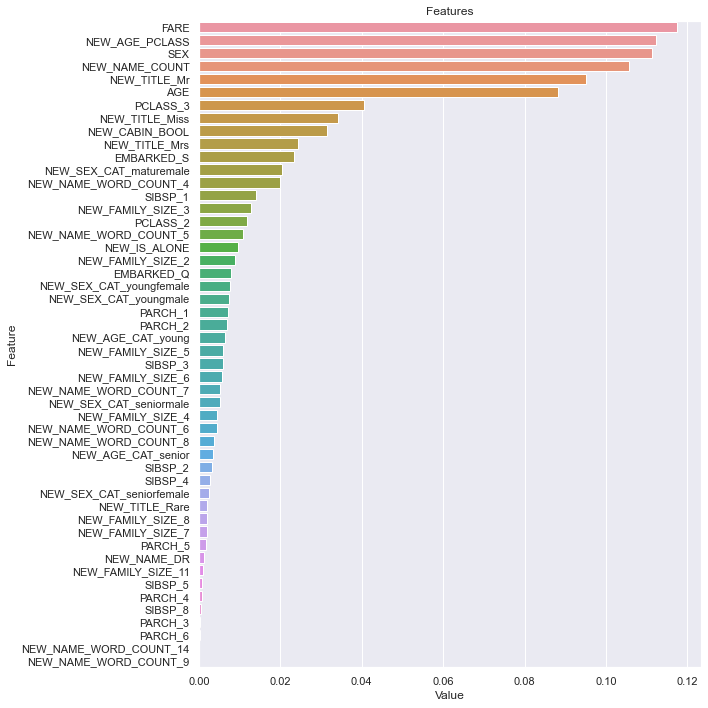

In [297]:
plot_importance(rf_model, X_train)